In [1]:
# Important libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#%matplotlib qt5
from matplotlib.animation import FuncAnimation

## Nonlinear heat equation with temperature dependent conductivity data

In [2]:
# For nonlinear Heat equation from the arXiv paper

def main(kappa0, chi):
    rho = 1
    Cp = 1
    
    M = 150
    N = 150
    tEnd = 15
    tau = tEnd / (M - 1)
    a = 1
    b = 3
    h = (b - a) / (N - 1)
    alpha = 2
    beta = 1
    x = np.zeros((N))
    u0 = np.zeros((N))

    for i in range(N):
        x[i] = a + (i - 1) * h
        u0[i] = 2 - (x[i] - 1)/2 + (x[i] - 1) * (x[i] - 3)

    t = np.zeros((M))

    for n in range(M):
        t[n] = (n - 1) * tau
    
    u_1 = np.zeros((N))
    u = np.zeros((N))
    uNext = np.zeros((N))
    G = np.zeros((N))
    L = np.zeros((N,N))
    U = np.zeros((N,M))
    L[0,0] = 1
    L[N-1,N-1] = 1
    U[:, 0] = u0

    for n in range(1, M):
        u = U[:,n-1]
        u_1 = U[:,n-1]
        eps = 1
        while eps > 0.0001:
            G[1] = u[0] - alpha
            G[N-1] = u[N-1] - beta
            for i in range(1, N-1):
                k = kappa0*np.exp(chi*u[i])
                Dk = chi*k
                D2k = chi*Dk
                v = (u[i+1] - u[i-1])/(2*h)
                A = (rho*Cp)/tau
                phi = A*(u[i] - u_1[i]) - Dk*v*v
                f = phi/k
                q = (-f*Dk + A -D2k*v*v)/k
                p = -2*Dk*v/k
                G[i] = u[i+1] - 2*u[i] + u[i-1] - h*h*f
                L[i, i-1] = 1 + 0.5*h*p
                L[i,i] = -2 - h*h*q
                L[i,i+1] = 1 - 0.5*h*p
            uNext = u - np.linalg.solve(L, G)
            eps = np.sqrt(h * np.dot(uNext - u, uNext - u))
            u = uNext
        
        U[:,n] = u

    return x, t, U


def animation(U, x):           
    # ++++++++++ plotting the results ++++++++++
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    p = U[:, 0]
    fig, ax = plt.subplots()
    cax = ax.plot(x, p)
    ax.set_aspect('equal', 'box')
    #fig.colorbar(cax)
    plt.close(fig)
    def animate(i):
        return ax.plot(x, U[:, i])
        #return cax.set_array(z[:, :, i].flatten())
    anim = FuncAnimation(fig, animate, frames=np.shape(U)[1], interval=1)
    return anim

In [3]:
x, t, U_orig = main(chi=-1, kappa0=0.1)
x, t, U_disc = main(chi=-0.76, kappa0=0.1)

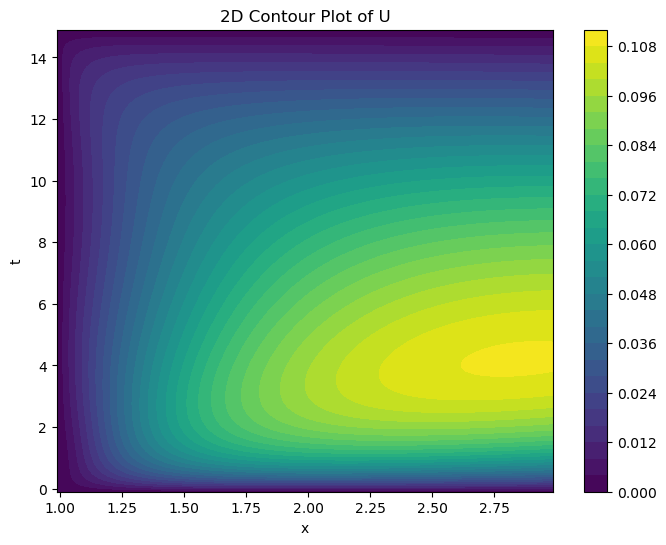

In [17]:
X, T = np.meshgrid(x, t)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, T, U_disc.T, cmap='viridis')
# ax.set_xlabel('x')
# ax.set_ylabel('t')
# ax.set_zlabel('U')
# plt.show()

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, T, (U_disc - U_orig), levels = 30, cmap='viridis')
plt.colorbar(contour)  # Add a color bar for reference
plt.xlabel('x')
plt.ylabel('t')
plt.title('2D Contour Plot of U')
plt.show()


In [9]:
np.linalg.norm(U_orig - U_disc, 'fro')

9.35581469994091

In [5]:
# Saving the data

heat_nonlinear_1d_data = {}
heat_nonlinear_1d_data["x"] = x
heat_nonlinear_1d_data["t"] = t
heat_nonlinear_1d_data["usol"] = U

sp.io.savemat('heat_nonlinear_1d_data.mat', heat_nonlinear_1d_data)

In [39]:
anim = animation(U, x)
anim.save('TempDepenHeat.mp4', writer = 'ffmpeg', fps = 1)